# Introduction to Sympy

This note was prepared by Renan Serpa based on the video lecture at [SymPy (Symbolic Expressions on Python) in one video](https://youtu.be/kx2GzBeGPco)

In [8]:
import sympy as sp
import numpy as np

#import matplotlib.pyplot as plt 

O proximo comando é para ter output bonito!

In [2]:
sp.init_printing() # escolhe a forma mais bonita para exibir o resultado. Se não for legal use `pprint()`

A primeira coisa a fazer apos importar o Sympy é definir variavles que vamos usar posteriormente. Não se preocupe, sempre pode acrescentar mais variavel se for necessario. A maneira mais facil é 

In [98]:
x ,y, z, t = sp.symbols('x y z t')

Outra forma de definir é 

In [4]:
from sympy.abc import x, y, z

Agora vamos criar uma expressão (função) com essas variaveis. Prestem atenção que o nome da expressão *f* não foi definido anteriormente mas o Sympy a criou automaticamente. 

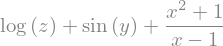

In [5]:
f= (x**2+1)/(x-1) + sp.sin(y)+sp.log(z)
f

### Substituição

In [6]:
f.subs(x,1) #O output quer dizer infinito

In [9]:
np.sqrt(2)

In [7]:
sp.sqrt(2)

In [10]:
sp.N(sp.sqrt(2))

Para definir uma função generica

In [102]:
F = sp.Function('F', real=True)

## Plot 2D

In [11]:
from sympy.plotting import plot

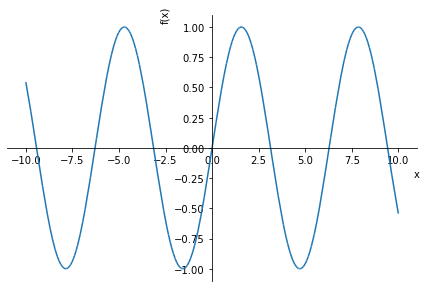

In [12]:
f=sp.sin(x)
plot(f)

Podemos delimitar os intervalo do plot

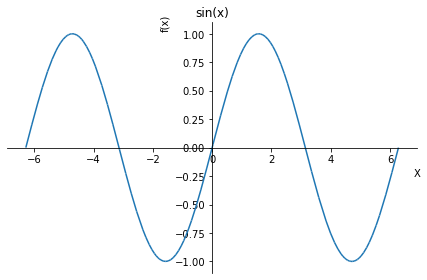

In [10]:
plot(f, (x,-2*sp.pi, 2*sp.pi), title = 'sin(x)', xlabel = "X")

Podemos plotar varias funções no mesmo intervalo

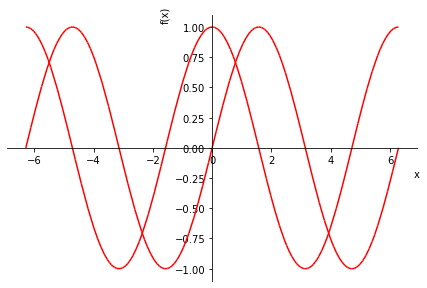

In [11]:
plot(sp.sin(x), sp.cos(x), (x,-2*sp.pi, 2*sp.pi),line_color='red')

Cada plot pode ter seu intervalo

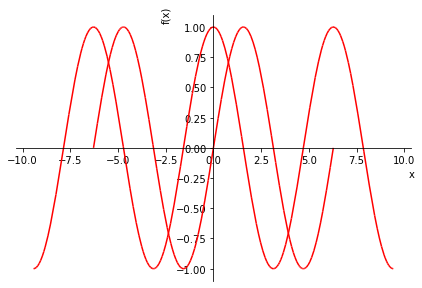

In [12]:
plot((sp.sin(x),(x,-2*sp.pi, 2*sp.pi)), (sp.cos(x), (x,-3*sp.pi, 3*sp.pi)),line_color='red')

Para que cada plot tenha uma cor difernte temos que fazer o seguinte

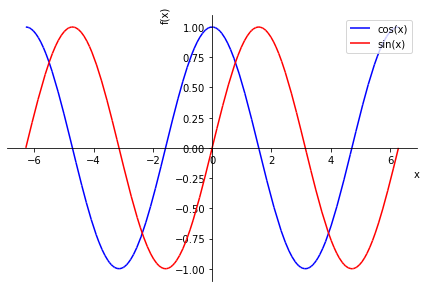

In [13]:
p1 = plot(sp.sin(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'red', show = False, legend = True)
p2 = plot(sp.cos(x), (x,-2*sp.pi, 2*sp.pi), line_color = 'blue',show= False, legend = True)
p2.extend(p1)
p2.show()

## Plot 3D

In [13]:
from sympy.plotting import plot3d
%matplotlib notebook 
#inline auto

<IPython.core.display.Javascript object>


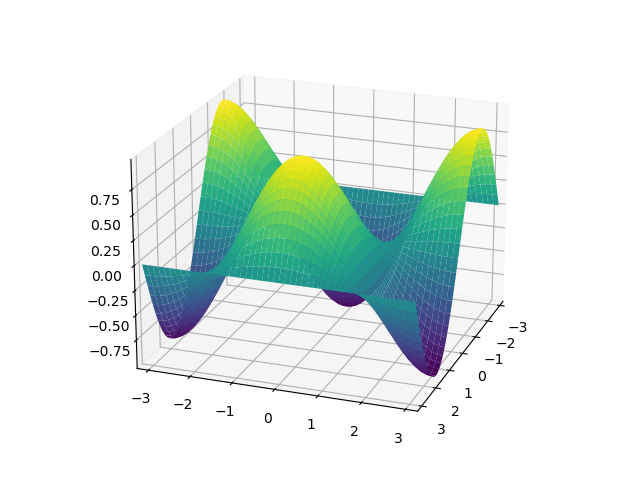

In [14]:
plot3d(sp.sin(x) * sp.cos(y), (x,-sp.pi, sp.pi),(y,-sp.pi, sp.pi))

### Outros plots

No total, o modulo `sympy.plotting` tem as seguintes funções de plot

- plot: Plots 2D line plots.

- plot_parametric: Plots 2D parametric plots.

- plot_implicit: Plots 2D implicit and region plots.

- plot3d: Plots 3D plots of functions in two variables.

- plot3d_parametric_line: Plots 3D line plots, defined by a parameter.

- plot3d_parametric_surface: Plots 3D parametric surface plots.

Podem consultar a documentação no [Plotting](https://docs.sympy.org/latest/modules/plotting.html)

## Algumas funções

Para definir uma integral

In [16]:
i = sp.Integral((x**2+1)/(x-1)) #Imprima bonito qualquer coisa!

E para resolver 

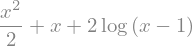

In [21]:
i.doit()

Para definir uma matriz

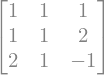

In [26]:
matriz= sp.Matrix(((1,1,1),(1,1,2),(2,1,-1)))
matriz

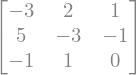

In [28]:
matriz.inv()

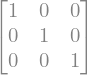

In [29]:
matriz * matriz.inv()

## Simplificação

O sympy conhece muitas identidades para simplicar as expressões matematicas. 

In [33]:
f=sp.sin(x)**2 + sp.cos(x)**2
f

Agora esse `f` é um objeto e tem varios metodos que podemos aplicar nele. 

In [34]:
f.simplify()

In [35]:
f.trigsimp() #Mesma coisa mas focada mais em trigonométricas.

In [38]:
f= x**3-x**2+x-1
f.simplify()

Podemos fatorizar o polinomial

In [37]:
f.factor()

Ou colocar uma variavel em evidencia

In [94]:
a, b, c=sp.symbols('a b c')

sp.collect(a*x**2+b*x**2+a*x-b*x,x) #Evidência

A forma de orientado ao objeto de fazer é 

In [31]:
f = a*x**2+b*x**2+a*x-b*x

In [33]:
f.collect(x)

Tem uma função do subdominio da `simplify` mas só para cortar os fatores comuns no numerador e denominador

In [0]:
cancel(x**2/x) #Comando mais dedicado a cancelar num e den. Simplify da no mesmo.

x

Outra função do subdominio da `simplify` para simplificar a potencia de uma expressão

In [35]:
sp.powsimp(x**a*x**b)

Para combinar os logaritmos $a \log(x) \rightarrow \log(x^a)$

In [42]:
f = a*sp.log(x)
f

In [36]:
a*sp.log(x).simplify()

In [43]:
sp.logcombine(a*sp.log(x),force=True) #Argumento force em todos pode dar problemas quando mistura com
                                #números imaginários, cuidado se isso existir.

## Algumas operações

Para expandir uma expressão que tem potencia

In [44]:
f=(x+2)**10
f

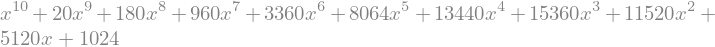

In [45]:
f.expand()

A função acima não expande as expressões trigonometrica, 

In [46]:
f= sp.sin(x+a)         #Veja que aqui deu diferença, ele serve para
f

In [47]:
f.expand()  #trigonométricas e só funciona antes do objeto

Para as expressões trigonometricas temos

In [51]:
sp.expand_trig(f) #<---

Para dividir uma epressão nas frações simples

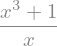

In [49]:
f = (x**3 + 1)/x
f

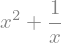

In [50]:
sp.apart(f)

A famosa decomposição de frações parciais, boa pra integrar depois, lembra?

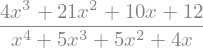

In [51]:
f=(4*x**3+21*x**2+10*x+12)/(x**4+5*x**3+5*x**2+4*x)
f

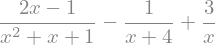

In [52]:
f.apart()

### Potências e logs

Algumas subfunções da `expand`

In [53]:
f = x**(a+b)
f

In [54]:
sp.expand_power_exp(f)

In [56]:
f = sp.log(x**2)
f

In [57]:
sp.expand_log(f,force=True)

O binomial é definido via

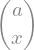

In [58]:
f=sp.binomial(a,x)
f

Para calcular a função em um ponto especifico, temos que substituir a variavel simbolica por um numero

In [59]:
f = sp.sin(x)*sp.cos(y)
f

In [60]:
f.subs(x,sp.pi/2)

In [61]:
f.subs(x,sp.pi/2).subs(y,sp.pi) #para substituir os dois valores

## Cálculo

### Derivadas

Para calcular a derivada de uma função temos duas opções

In [62]:
f=sp.cos(x*y)
f

In [63]:
df=sp.diff(f,x)
df

Ou

In [64]:
f.diff(x)

A segunda derivada é calculada via

In [65]:
sp.diff(f,x,2) #Número de derivadas, deu o mesmo.
            #Apenas mude o símbolo para derivar em outra variável.

In [66]:
f.diff(x,2)

Ou a derivada em relação das duas variaveis

In [67]:
f.diff(x,y)

A definição de uma função generica é 

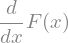

In [108]:
F(x).diff()

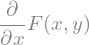

In [107]:
F(x,y).diff(x)

In [109]:
G = sp.Function('G', real=True)

E a regra de cadeia já está definida!

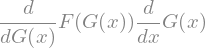

In [110]:
F(G(x)).diff()

### Integrais

A integração definida é 

In [70]:
df= sp.exp(-x)
df

In [71]:
sp.integrate(df,(x,0,sp.oo)) #infinito é dois ós

E indefinida 

In [69]:
sp.integrate(df,x) #Integral indefinida

E a integral dupla

In [72]:
#Aqui é uma integral do tipo SS ... dxdy 
sp.integrate(sp.exp(-x**2-a**2),(x,-sp.oo,sp.oo),(a,-sp.oo,sp.oo))

### Limite

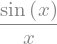

In [74]:
f = sp.sin(x)/x
f

In [75]:
sp.limit(f, x, 0)

E os limites direcionais

In [76]:
f = 1/x
f

In [77]:
#Diferença de lados positivos e negativos
sp.limit(f,x,0,'+')

In [78]:
sp.limit(f,x,0,'-')

# Solvers

Primeiro temos que construir uma igualidade para depois resolver

In [79]:
#Construindo equação, algo = a algo
equ = sp.Eq(x**2,1) #x^2 =1
equ

In [83]:
sp.solveset(equ,x) #Todas as soluções possíveis

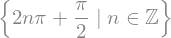

In [82]:
sp.solveset(sp.sin(x)-1,x) #Ciclo de soluções!

In [84]:
sp.solve(sp.sin(x)-1,x) #A primeira solução!

### Sistema de equações lineares

Aqui queremos resolver uma um sistema linear com tres equações e tres incognitas

$$
\begin{cases}
x+y+z = 1 \\
x+y+2z = 3 \\
2x+y-z = 10
\end{cases}
$$

Primeiro temos que trandformar as equações em formato $f(x,y,z)=0$

$$
\begin{cases}
x+y+z - 1 =  \\
x+y+2z - 3 = 0 \\
2x+y-z - 10 = 0
\end{cases}
$$
Aí, podemos passar para o `sympy` dentro de uma lista

In [85]:
#Isole a equação para igualar a zero, escreva
sp.solve([x+y+z-1,x+y+2*z-3,2*x+y-z-10],(x,y,z))

Um caso de solução impossível

In [88]:
sp.solve((x+y+z-1,x+y+2*z-3,x+y-z-5),(x,y,z))

In [89]:
sp.linsolve((x+y+z-1,x+y+2*z-3,x+y-z-5),(x,y,z))

Também te dá caso seja indeterminado, fica em função de variavel

In [91]:
sp.solve([x+y+z-1,x+y+2*z-3],(x,y,z))

In [96]:
eq= sp.Eq(a*x**2 +b*x+ c,0)
eq

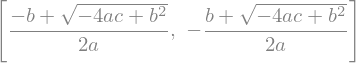

In [97]:
sp.solve(eq,x)

### Sistema de equações não lineares

In [92]:
sp.nonlinsolve((x**2-1,y**2-1),(x,y))

In [93]:
sp.solve((x**2-1,y**2-1),(x,y))